# Support Vector Machines

In [2]:
import sklearn
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import numpy as np  
import pandas as pd 
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

## Load a Simulated Dataset

Similar to how we explored clustering, we will begin exploring Support Vector Machines (SVMs) by looking at how they preform on the simulated data sets below. There are a few advantages of starting with simulated data rather than a real world problem. First off, it allows us to generate data with specific properties, such as being difficult to separate, and secondly, by creating a 2D data set we ensure that we are able to view the entire data set in the plan and see what the SVM separation boundary looks like. After exploring these data sets, we will apply our knowledge of SVMs and kernels to a real data set.

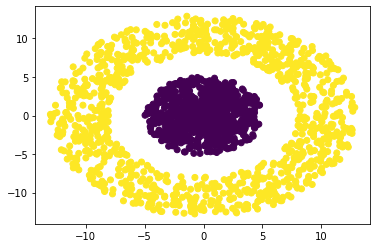

In [3]:
# Import the data into a pandas data frame
df = pd.read_csv('data/X1.csv')
# Extract the values into a numpy array
X1 = df.values
# Create a scatter plot based on the data and the data labels
plt.scatter(X1[:,0],X1[:,1],c=X1[:,2])
plt.show()

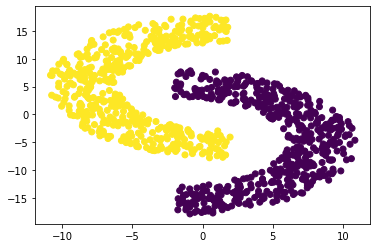

In [4]:
# Import data
df = pd.read_csv('data/X2.csv')
# Extract data frame into an array
X2 = df.values
# Make a scatter plot
plt.scatter(X2[:,0],X2[:,1],c=X2[:,2])
plt.show()

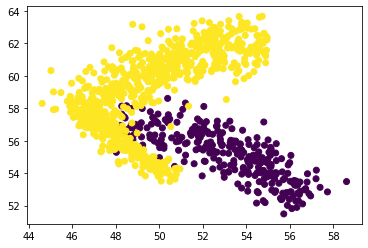

In [5]:
# Import feature vectors
df = pd.read_csv('data/X.csv')
X3 = df.values
# Import labels
df = pd.read_csv('data/Y.csv')
Y3 = df.values
Y3 = Y3.flatten()
# Create a scatter plot
plt.scatter(X3[:, 0], X3[:, 1], c=Y3);
plt.show()

Since we have loaded in 3 data sets above, the below cell lets us set which data set we want to work for the time being. It starts being set to $X1,$ but feel free to go in and change this as we continue in the cells below. This is the only spot you need to change the data set we are working with while investigating Kernels. 

In [11]:
# TODO: Select which data set we want to work with by uncommenting lines.
#       Make sure the data set you are not interested is commented, so only
#       have 1 uncommented at a time

# To use data set 1, uncomment these lines
X=X1[:,0:2]
Y=X1[:,2]

# To use data set 2, uncomment these lines
# X=X2[:,0:2]
# Y=X2[:,2]

# To use data set 3, uncomment these lines
# X=X3
# Y=Y3

# This line formats the class labels so that they will work with out SVMs
# Do NOT comment this line out
Y=Y.astype(int)

# This flips the colors to make the plot below look good
Y = Y - 1

## Sklearn SVMs

Sklearn has a great library for SVMs. There are a number of different implementations of SVMs by Sklearn, and in this session we will be using Sklearn.svm.SVC. This is a good implementation because it is very flexible with the use of kernels and multiclass classification problems. It scales well for problems with up to 10,000 data points. SVC sets the default kernel to 'rbf' but we will begin by using a 'linear' kernel. More information on Sklearn.svm.SVC can be found at https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Additional information on classifiers provided in the Sklearn library can be found at https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm and https://scikit-learn.org/stable/modules/svm.html#svm. Notibly, the LinearSVC is very similar to the SVC model we are working with, but it is more flexible in terms of which cost function you use and scales well to larger problems. However, it is limited by the fact that it must have a linear kernel.

## Initial SVM with Linear Kernel

Here we are loading all of our data into an SVM to see what decision boundary will be created. Usually, when creating an model it is important to partition the data in order to have some method for model validation, but in this case since we are using 2 dimensional data we will be able to visually inspect the decision boundary. Later on, when we use SVMs to make predictions, we will partition the data.

In [7]:
# Create a SVC model
model = svm.SVC(kernel='linear')
# Train the model on the data set you selected above
model.fit(X,Y)

SVC(kernel='linear')

The next cell of code shows the decision boundary formed by the model we just created.

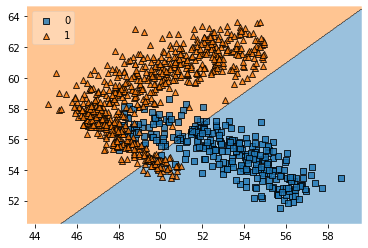

In [8]:
# Plot the decision region created by the SVC model. We will use this function a lot today
plot_decision_regions(X, Y, clf=model, legend=2)
plt.show()

From the plot of the decision boundary above, we see that this model could greatly be improved if it had a nonlinear decision boundary. To do this, we will explore a few different kernels to see how they change the decision boundary.

## Kernels

Support Vector Machines (SVMs) are powerful tools for machine learning, and they become even more powerful when a kernel is used to define a more complex decision boundary. The Sklearn library provides a number of kernels that can be used in the SVC model we are using. We will have already seen a linear kernel, so now we will repeate the steps above using the following kernels
1. rbf (default kernel for SVC)
2. poly
3. sigmoid

Each type of kernel has different parameterizations based on its mathematical formulation. Additional information on the kernels used in sklearn can be found at https://scikit-learn.org/stable/modules/svm.html#svm-kernels

### Rbf Kernel
The rbf kernel uses the exponential function
<center> $exp(-\gamma\|X-X'\|)$
    
to measure the distance between the points $X$ and $X'.$ When viewing the decision boundary from the model below, vary the parameter gamma to see how it changes the decision boundary (gamma > 0).

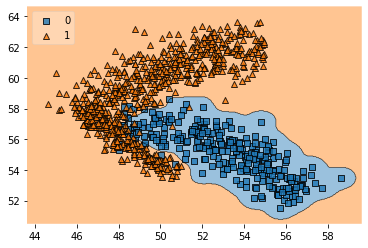

In [9]:
# Create a SVM with a rbf kernel

# TODO: Modify the gamma value of the kernel
model = svm.SVC(kernel='rbf', gamma = 3)
# Fit the model to the data set selected above
# TODO: Fit the model
model.fit( X  , Y  )
# Show the decision boundary we created
plot_decision_regions(X, Y, clf=model, legend=2)
plt.show()

### Polynomial Kernel
The polynomial kernel uses the function 
<center>$(\gamma\langle X,X'\rangle+r)^d$
    
to measure the distance between the points $X$ and $X'.$ By default, $d$ will be set to 3, but this can be modified in the parameters of the model. Again, you can vary the parameters to see how it affects the decision boundary ($d$ is given as degree and $r$ is given as coef0).
    
Note: the run time scales with $d$

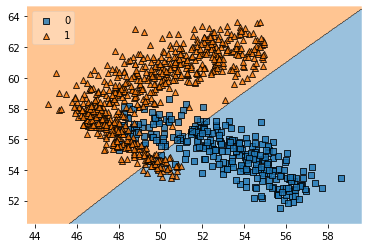

In [10]:
# Create a SVM with a polynomial kernel and modify the parameters

# TODO: Modify the gamma, degree and coef0 values of the kernel.
#       If you make degree too large, it will take longer
#       I recommend degree <= 6
model = svm.SVC(kernel='poly', gamma = 3  , degree =  2 , coef0 = 1  )
# Train the model on the data set you selected above
model.fit(X,Y)
# Show the decision boundary that the SVC created
plot_decision_regions(X, Y, clf=model, legend=2)
plt.show()

### Sigmoid Kernel

The sigmoid kernel uses the function
<center>$\tanh(\gamma\langle X,X'\rangle+r)$
    
to measure the distance between the points $X$ and $X'$
    
The $tanh(x)$ function we see here has the following graph:

<!DOCTYPE html>
<html>

<body>
<div class="row">
  <div class="column">
    <img src="imgs/tanh.png" alt="tanh function" style="width: 400px">
  </div>
</div>

</body>
</html>

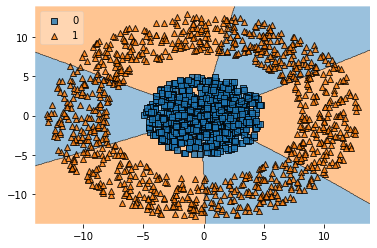

In [12]:
# Create the SVM with a sigmoid kernel and modify the parameters

# TODO: Modify the gamma and coef0 parameters of the kernel
#       NOTE: Sometimes this kernel doesn't work well with X3
model = svm.SVC(kernel='sigmoid', gamma =  2 , coef0 =  2 )
# Train the SVC on the data set you selected above
model.fit(X,Y)
# Plot the decision boundary
plot_decision_regions(X, Y, clf=model, legend=2)
plt.show()

The point of the above code is to give some intuition for how kernels impact a SVM and an understanding how why distance is such an important concept in machine learning. It is important to note that in the above code, we have only use 1 type of machine learning model, but we see that by varying the kernel we apply to the model we get varying results.

Typically, a kernel should NOT be selected by trying to visualize the decision boundary. This is impractical for datasets in higher dimensions, and it would discount the importance of having a validation method. Kernel selection should go through a process similar to the model validation process we have discussed.

## Multiclass Classification with SVMs

The 3 main types of machine learning problems are
1. Supervised learning (Classification)
2. Unsupervised learning (Clustering)
3. Reinforcement learning

So far we have seen a number of supervised learning or classification algorithms (neural networks, Naive Bayes, SVMs, etc.). Generally, these classification algorithms, and especially SVMs are used for binary classification problems. However, in many cases there are more than 2 classes in a supervised learning problem. In this section, we will cover the 2 main methods, one vs. rest and one vs. one, which are adaptations of binary classifiers for multiclass problems.

### One vs. One (OvO) Classification

Given a classification problem involving $K$ classes, $K(K-1)/2$ binary classifiers are created. Each of these binary classifiers is similar to the SVMs we have previously seen, and at training time, each classifier is passed all of the training examples from 2 classes and learns to distinguish between them (For a $K$ class problem, there are $K(K-1)/2$ pairs of classes). At testing time, given a new data point, all $K(K-1)/2$ classifiers are run on that point and vote to which class is should belong to. After the voting is complete, the model labels the test data as the class that had the highest number of votes. OvO classification is how the SVC model we have been using handles multiclass classification problems.

### One vs. Rest (OvR) Classification

One vs. Rest classification, also called One vs. All (OvA) or One Against All (OAA), is a method for a $K$ class classification problem where $K$ binary classifiers are trained to determine if a data point belongs to a class or not. At training time, each binary classifier is passed all of the training data where the samples of one class are positive and all other samples are negative (Each binary classifier will have a different class be positive). This method of partitinoing the training data causes each binary classifier to be trained on unbalanced data. Then at test time, the test data is passed to all binary classifiers and, similar to OvO classification, the binary classifiers vote for which class the test data belongs to.

### Voting Schemes

Both OvO and OvR classification schemes rely on binary classifiers to vote, and a potential issue that can arries here is ties in voting. In the case of OvO, if there is a tie, the model needs a method for breaking the tie. In OvR, since there is only 1 model that can vote for each class, if there is a tie, the tie will have values of either 1-1 or 0-0 (it could be a multiclass tie). To avoid this, each in OvR each binary classifier can give a confidence value for its vote, so in the case of a tie the model defaults to the binary classifier with the highest confidence. This method of confidence intervals is not perfect, and unbalanced training data can lead to variation in the scale of the confidence values.


Make description shorter 

## Iris Data Set

The Iris Data Set is a famous a popular data set for machine learning. The data set contains measurements from 150 flowers belonging to 3 different species of Iris flowers (50 flowers per species). This data set was introduced in 1936 by Robert Fisher and remains a popular data set for practicing multiclass classification problems. For each flower, the dataset contains the features:
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   
While this data set is 4 dimensional, it is known that 1 of the classes is linearly separable from the other 2, but the other 2 are not linearly separable from each other. This makes it interesting for applying our new knowledge of Kernels. The goal is to use these features to classify a flower as belonging to 1 of these 3 species:
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica

<!DOCTYPE html>
<html>

<body>
<div class="row">
  <div class="column">
    <img src="imgs/iris_setosa.jpg" alt="Snow" style="width: 200px">
    <center>Iris Setosa</center>
  </div>
  <div class="column">
    <img src="imgs/iris_versicolour.jpg" alt="Forest" style="width: 200px">
    <center>Iris Versicolour</center>
  </div>
  <div class="column">
    <img src="imgs/iris_virginica.jpg" alt="Mountains" style="width: 200px">
    <center>Iris Virginica</center>
  </div>
</div>

</body>
</html>

### Load Iris Data

In [16]:
# Load the data set
df = pd.read_csv('data/iris.data')

# Extract the feature vectors
X_df = df.iloc[:,0:4]
X = X_df.to_numpy()

# Make the data labels. They can be made this way because we know the order of the data set
Y = np.zeros((150,))
counter = 0
while counter < 150:
    if counter < 50:
        Y[counter] = 1
    elif counter < 100:
        Y[counter] = 2
    else:
        Y[counter] = 3
    counter = counter + 1

Y = Y.astype(int)

# Split the data set into training and testing sets
data_train, data_test, labels_train, labels_test = train_test_split(X, Y, test_size=0.60)

### Explore the Data Set
Since this data is 4 dimensional, there is no simple way to visualize it in the plane. However, we are able to project the 4D data into 2D to visualize it. By changing the indecies in the scatter plot below, we can visualize the data projected into different dimensions.

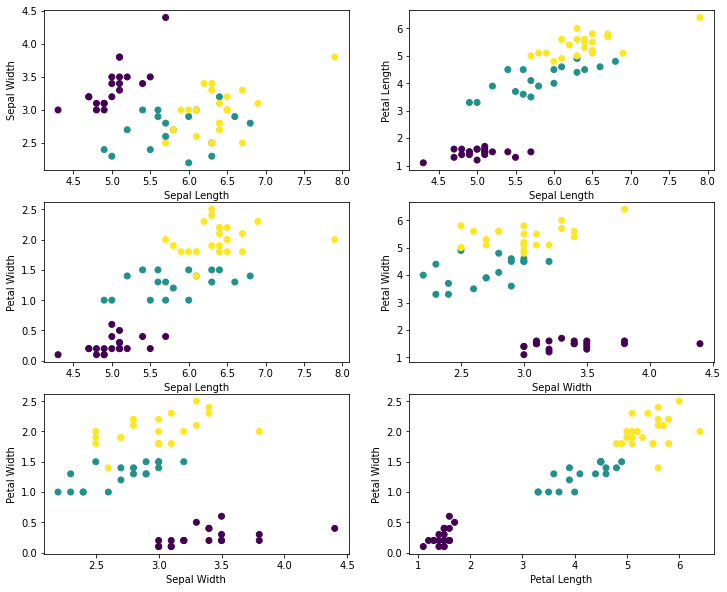

In [17]:
# Set the plot size
plt.rcParams['figure.figsize'] = [12, 10]

# Set it to make 6 plots
fig, axs = plt.subplots(3,2)
# Plot projection of the data set

# Make each plot
axs[0,0].scatter(data_train[:, 0], data_train[:, 1], c=labels_train)
axs[0,0].set_xlabel('Sepal Length')
axs[0,0].set_ylabel('Sepal Width')

axs[0,1].scatter(data_train[:, 0], data_train[:, 2], c=labels_train)
axs[0,1].set_xlabel('Sepal Length')
axs[0,1].set_ylabel('Petal Length')

axs[1,0].scatter(data_train[:, 0], data_train[:, 3], c=labels_train)
axs[1,0].set_xlabel('Sepal Length')
axs[1,0].set_ylabel('Petal Width')

axs[1,1].scatter(data_train[:, 1], data_train[:, 2], c=labels_train)
axs[1,1].set_xlabel('Sepal Width')
axs[1,1].set_ylabel('Petal Width')

axs[2,0].scatter(data_train[:, 1], data_train[:, 3], c=labels_train)
axs[2,0].set_xlabel('Sepal Width')
axs[2,0].set_ylabel('Petal Width')

axs[2,1].scatter(data_train[:, 2], data_train[:, 3], c=labels_train)
axs[2,1].set_xlabel('Petal Length')
axs[2,1].set_ylabel('Petal Width')

# Reset the default size of the plots
plt.rcParams['figure.figsize'] = [6.4, 4.8]

### Explore Different SVM Models for Multiclass Classification with Kernels
One method to explore how to develope the best classifier is to find a classifier that performes well at seperating these 3 classes in each of the 6 above projections. In the cell below, we have defined a function to test out a classifier in each of projection and plot th decision boudaries, similar to what we did when exploring the different types of kernel functions and their parameters. While this is not a foolproof method for model selection, generally if a single model preforms well in all projections of the feature space, then it will preform well when the entire feature space is used, and if a model doesn't preform well in any of the projections, then it is likely not going to work well when the entire feature space is used.

Note: This type of experiment will only work because the feature space is 4D. As we saw above, there are only 6 projections from 4D to 2D, so we are able to view them all. However, as the size of the feature space grows, the number of projections will grow very quickly. (In an $n-$dimensional feature space, the number of projections is equal to the number of pairs of features, which is given by $n$ choose 2 or $\binom{n}{2}=\frac{n!}{2!(n-2)!}$).

In [18]:
def plot_projections(model, X, y):
    # Set the plotting parameters so we can see all 6 projections
    fig, axs = plt.subplots(3, 2, figsize=(12, 10))
    # Count which number chart we have made
    chart = 0
    # Outter is used to iterate over 1 of the features we will be using for the projection
    outter = 0
    while outter < 3:
        # Inner is used to iterate over the 2nd feature we will be using for the projection
        inner = outter + 1
        while inner < 4:
            
            # Project the feature space to only the features defined by the outter and inner counters
            X_temp = np.array([X[:,outter], X[:,inner]]).T
            
            # Fit the model to this data projection
            model.fit(X_temp, y)            
            
            # Plot the decision boundaries of the model for this given projection
            fig = plot_decision_regions(X_temp, y, clf=model, ax=axs[int(np.floor(chart/2))][int(chart%2)], legend=2)

            # Increment the chart counter and the counters used to select which features are used in the projection
            chart = chart + 1
            inner = inner + 1
        outter = outter + 1

    axs[0,0].set_xlabel('Sepal Length')
    axs[0,0].set_ylabel('Sepal Width')

    axs[0,1].set_xlabel('Sepal Length')
    axs[0,1].set_ylabel('Petal Length')
    
    axs[1,0].set_xlabel('Sepal Length')
    axs[1,0].set_ylabel('Petal Width')
    
    axs[1,1].set_xlabel('Sepal Width')
    axs[1,1].set_ylabel('Petal Width')
    
    axs[2,0].set_xlabel('Sepal Width')
    axs[2,0].set_ylabel('Petal Width')
    
    axs[2,1].set_xlabel('Petal Length')
    axs[2,1].set_ylabel('Petal Width')
    
    # Reset the default size of the plots
    plt.rcParams['figure.figsize'] = [6.4, 4.8]

Now that we have defined the above function, in the next cell, we can pass a model and the Iris data into the function to visualize how well our model works in each projection. You should try a variety of kernel functions and parameters to see which are effective.

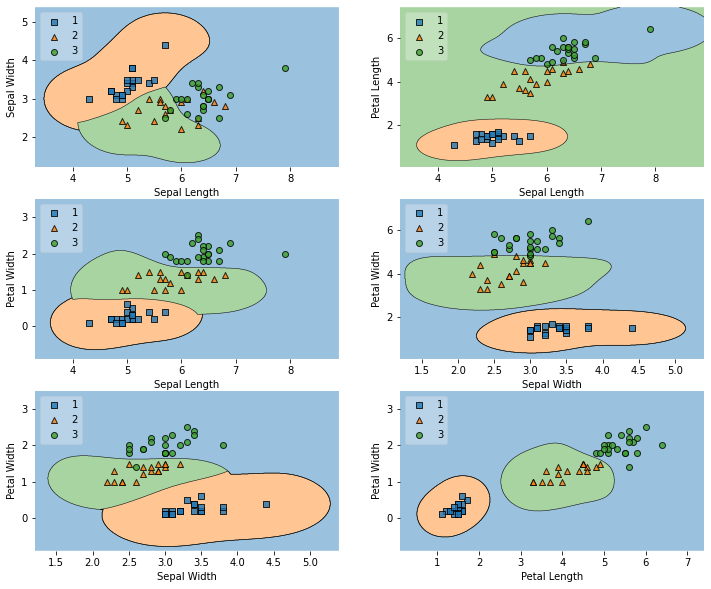

In [24]:
# TODO: Create an SVM and parameterize is however you want
model = svm.SVC(kernel = 'rbf', gamma = 3)

# Plot the decision boundaries for this model and the training data
plot_projections(model, data_train, labels_train)

### Model Validation

Now that we have learned a little about SVMs, kernels, and multiclass classification, it is time to preform model validation and testing. So far, we have only been exposed to the training data, but our goal is to develope a model that will generalize well to the remaining data from the Iris data set. To do this, we will preform cross validation on a model that preformed well in the previous section.

In [29]:
# Function definition
def k_fold_cross_validation(X, y, k, model):
    
    # This array will store the accuracy for each fold
    accuracy = np.zeros((k,1))
    
    # This will count which fold are on
    fold = 0
    
    # StratifiedKFold is a function to split the data into training and validation sets
    skf = StratifiedKFold(n_splits = k) # k is a parameter passed to the function
    
    # This loop executes 1 time per fold, k times total
    for train_indices, test_indices in skf.split(X,y):
        
        # Get the training and validation data
        # TODO: Fill this in
        X_train, X_validation = X[train_indices], X[test_indices]
        Y_train, Y_validation = y[train_indices], y[test_indices]
        
        # Train the model on the training data
        # TODO: Fit your model
        model.fit(X_train, Y_train)
        
        # Get the predictions from the validation data
        # TODO: make predictions
        predictions=model.predict(X_validation)
        
        # Create and show the confusion matrix based on the predictions and the true labels of the validation data
        # confusion_mat=metrics.confusion_matrix(Y_validation, predictions, labels = [1, 2, 3])
        # print(confusion_mat)
        
        # Compute the accuracy
        # TODO: Fill this out
        accuracy[fold] = accuracy_score(Y_validation, predictions)
        
        # Increase the fold counter
        fold += 1
    
    # Return the mean and standard deviation of your accuracy
    return np.mean(accuracy), np.std(accuracy)

In [30]:
# Set k, the number of folds for cross validation
# TODO: Set k
k = 4

# TODO: Make an SVM
model = svm.SVC(kernel = 'linear')

# Call the function above with the model we created in the previous line
# TODO: Fill in the cross validation parameters
mean, std = k_fold_cross_validation(data_train, labels_train, k, model)

#data_train, data_test, labels_train, labels_test

print('Results from', k, 'fold cross validation')
print('Accuracy Mean:', mean)
print('Accuracy Standard Deviation:', std)

[[5 0 0]
 [0 4 0]
 [0 0 6]]
[[5 0 0]
 [0 4 0]
 [0 0 6]]
[[5 0 0]
 [0 4 1]
 [0 0 5]]
[[5 0 0]
 [0 5 0]
 [0 0 5]]
Results from 4 fold cross validation
Accuracy Mean: 0.9833333333333334
Accuracy Standard Deviation: 0.02886751345948128


Once we finish cross validation, we can advance to evaluate our model on the testing data set.

In [31]:
# Fit our model on the training data
model.fit(data_train, labels_train)

# Make predictions on the testing data
predictions = model.predict(data_test)

# Compute the accuracy
testing_accuracy = accuracy_score(labels_test, predictions)
print('Testing Accuracy:', testing_accuracy)

Testing Accuracy: 0.9555555555555556


## Excercise

Now that we have explored some of the basics of SVMs and their Kernel function, we will apply this knowledge to predict which cells are cancerous. The data set below contains information on the following 10 features of cell nuclie from cells found in breast masses. These features include:
1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

In each image and for each of these features, the mean, standard error, and mean of the 3 largest values was recored, resulting in the 30D dataset we will explore below.

This data set is not evenly weighted. Of the almost 600 examples we have, almost 2/3 of them are malignant and only 1/3 is benign. 

When loading this data set, we will all have the exact same training set, which should be used for training and validating our models, and we will all have the same test data sets. Using our knowledge of SVMs, the goal is to acheive the highest performance metrics on the test set.

This data set was originally generated at the University of Wisconsin by Dr. William H. Wolberg, W. Nick Street, and Olvi L. Mangasarian. More information on the data set can be found at https://www.kaggle.com/uciml/breast-cancer-wisconsin-data?select=data.csv and https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

### Load the data set and partition it for training and testing

In [33]:
# Load in the data set
df = pd.read_csv('data/cancer.csv')

# Select which columns we want to keep. By default this includes everything
df = df[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']]

# Do NOT modify this line of code
train, test = train_test_split(df, test_size=0.3, random_state=42, shuffle=True)

While there are 30 features to select from in the data set, we could train our model on fewer features. In the next cell, we define the 'used_features' array that contains all of the features we want to include. By default, this array contains all of the features in the data set, but feel free to try removing some.

### Return here after calculating information gain

In [37]:
# Do not modify the cell during the first time. After we examine information gain of each feature, we will return here

# TODO: Select which fields in the data set you want to include
# used_features = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']
used_features = ['perimeter_worst', 'concave points_mean', 'concave points_worst', 'area_worst', 'radius_worst', 'perimeter_mean']

Based on the 'used_features' array in the cell above, this next cell works to split up the training and testing features and labels into numpy arrays, only including the features we selected above.

In [38]:
# Split the data into training and testing data and labels
training_labels_temp = train[['diagnosis']]
training_features = train[used_features]
testing_labels_temp = test['diagnosis']
testing_features = test[used_features]

# Extract the values in the feature vectors
training_features = training_features.values
testing_features = testing_features.values

# Give the training label vector a numeric format
labels = training_labels_temp.values
training_labels = np.zeros((len(labels),))
for i in range(len(training_labels)):
    if str(labels.T[0][i]) == 'B':
        training_labels[i] = 1
        
# Give the testing label vector a numeric format
labels = testing_labels_temp.values
testing_labels = np.zeros((len(labels),))
for i in range(len(testing_labels)):
    if str(labels.T[i]) == 'B':
        testing_labels[i] = 1

# Make the label vectors of type int so that they work with our SVC models
training_labels = training_labels.astype(int)
testing_labels = testing_labels.astype(int)

### Calculate Information Gain
Now that we have loaded and partitioned our data, we will calculate the information gain for each feature. Sklearn has the function "mutual_info_classif" that can be used to calculate information gain, similar to what we have seen in lecture. More information on the implementation of this can be found at: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html

In [39]:
# Calculate the information gain for each feature in the data set
# TODO: fill in the training_features and training_labels
information = mutual_info_classif(  training_features , training_labels  )

# Place the features and information for each feature in a dictionary
information_gain = dict(zip(information, used_features))

# Print out the dictionary we just created, with the most significant features first
for i in sorted(information_gain, reverse = True):

    # TODO: fill in the print statement
    print(str(  i ) + ": " + str( information_gain[i]  ))

# Print the number of features in the dictionary
print(len(information_gain))

0.4535574210853084: perimeter_worst
0.44697710671536184: concave points_worst
0.44345193570752794: concave points_mean
0.4388633428396367: area_worst
0.4347851568276886: radius_worst
0.37260815233153766: perimeter_mean
6


Now that we have calculated information gain for each feature, we can go back to the previous cell where we define the "used_feature" array and modify it to only include the features with the highest information gain. Once we remove the unnecessairy features from the "used_feature" vector, we should rerun the subsequent cells to reload the data with only the selected features and again partition it into training and testing sets. After reloading and partitioning the data is complete, you can again calculate information gain using the cell above and repeat this process.

### Calculating Performance Metrics from the Confusion Matrix

In the next cell, we define a function that we will use to calculate some basic performance metrics from a confusion matrix. These metrics are defined by the same equations seen in lecture.

In [40]:
def performance_metrics(confusion_matrix, metric):
    # TODO: Fill in the indecies of the confusion matrix
    TP = confusion_matrix[0][0] # True Positive
    FP = confusion_matrix[0][1] # False Positive
    FN = confusion_matrix[1][0] # False Negative
    TN = confusion_matrix[1][1] # True Negative
    total = TP + FP + FN + TN
    if metric == 'Accuracy':
        return (TP + TN) / total
    elif metric == 'Sensitivity':
        return TP / (TP + FN)
    elif metric == 'Specificity':
        return TN / (TN + FP)
    elif metric == 'False Positive Rate':
        return FP / (FP + TN)
    elif metric == 'Precision':
        return TP / (TP + FP)
    elif metric == 'F1 Score':
        precision = TP / (TP + FP)
        recall = TP / (TP + FN) # Recall is sometimes called sensitivity
        return 2 * recall * precision / (recall + precision)
    else:
        return None

In the next cell, select which metric you want to focus on in the following sections. Rather than looking at every metric at once, we focus on one at a time. Feel free to change this as you explore the code

In [41]:
# TODO: Select which performance metric you want to work with
my_metric = 'F1 Score'

### Training Our Model

Now that this performance metric function is defined, we can create a function for cross validation and use it to calculate the preformance of different models on our training data. In the next cell, we define a function for cross validation. This function is slightly different than the function we used with the Iris data set because it calls "performance_metrics"

In [42]:
# Function definition
def n_fold_cross_validation(X, y, k, model, metric):
    
    # These arrays will be used to store the performance metrics from each fold
    metric_by_fold = np.zeros((k,1))
    # Count the fold we are on
    fold = 0
    
    # This is a function that we will use to split the data into training and validation sets
    skf = StratifiedKFold(n_splits=k)
    for train_indices, test_indices in skf.split(X,y):
        
        # Get the training and validation data
        X_train, X_test = X[train_indices], X[test_indices]
        Y_train, Y_test = y[train_indices], y[test_indices]

        # Train the model on the training data
        model.fit(X_train, Y_train)
        
        # Get the predictions from the validation data 
        predictions = model.predict(X_test)
        
        # Create the confusion matrix based on the predictions and the true labels of the validation data
        # TODO: fill in the true value and the predictions to make the confusion matrix
        confusion_matrix = metrics.confusion_matrix(  Y_test ,  predictions , labels = [1, 0])

        # Compute the performance metric you are interested in
        # TODO: fill in the parameters here
        fold_metric = performance_metrics( confusion_matrix  , metric  )
        
        # Make sure we have a valid performance metric
        if fold_metric == None:
            print('N fold cross validation exited because you entered an invalid metric.')
            return
        
        # TODO: Copy the metric into the array for each fold
        metric_by_fold[fold] = fold_metric
        # Increment the fold counter
        fold += 1
    
    # Calculate the mean and standard deviation for your performance metric
    print(metric, ' Mean: ', str(np.mean(metric_by_fold)))
    print(metric, ' Standard Deviation: ', str(np.std(metric_by_fold)))

We are now ready to create our model. In the following cell, define your classifier. Select a kernel and parameters for it. An additional parameter that can be set is "class_weight." You may have noticed that almost 2/3 of the examples in the training set are malignant (which is given a value of 1 in our code). "class_weight" lets us create the model so that the high frequency of occurence of malignant cells does not prevent the classifier from being effective. A numeric value for each class in the classifier can be given in the form of a dictionary (as seen in the starter code) or there are other ways this parameter can be set automatically. More information can on "class_weight" can be found under the parameter section on this page: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [55]:
# Create a SVC classifier with whatever parameters you choose

# TODO: Select a kernel and parameters for it
#       class_weight is another parameter we can modify
model = svm.SVC(kernel = 'rbf', gamma = 0.0000001, class_weight={1: 0.5})

Now that the model has been created, it can be passed to the cross validation function.

In [56]:
# TODO: Set n, the number of folds for cross validation
n = 4
# Pass the model we created and the training data to the cross validation function
n_fold_cross_validation( training_features , training_labels, n, model,  my_metric   )

F1 Score  Mean:  0.9192820594395398
F1 Score  Standard Deviation:  0.026162153167305833


You should try multiple models and parameter setting in the cells above to see which are likely to maximize whichever performance metrics you are interested. This should take multiple iterations since determining the optimal classifier is not a simple task.

### Test Your Model

So far, we have only worked with the training portion of this data set. As with all machine learning problems, it is important to have a clear separation between training and test data, which is why our parameter tuning with the cross validation that we just preformed only used the training data. When good data is collected, the training data is representative of the test data, so if a model preformed well in training it should have similarly good preformance metrics on the testing data.

Once you are satisfied with your results from cross validation and they are consistent, you can execute the following code to see how well it classifies the test data set.

In [57]:
# Fit our model on the training data
model.fit(training_features, training_labels)

# Make predictions on the testing data
predictions = model.predict(testing_features)

# Generate a confusion matrix based on the testing data predictions and true labels
confusion_matrix = metrics.confusion_matrix(testing_labels, predictions, labels = [1, 0])

# Calculate the preformance metrics from the confusion matrix
metric_value = performance_metrics(confusion_matrix, my_metric)
print('Test', my_metric, ':', metric_value)

# TODO: Discuss your results with everyone

Test F1 Score : 0.9596412556053812
